In [4]:
!pip install keras
!pip install tensorflow

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 876.3 kB/s eta 0:00:02
   ---------------------- ----------------- 0.8/1.4 MB 1.0 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 1.0 MB/s eta 0:00:01
   ------------------------------------- -- 1.3/1.4 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.0 MB/s eta 0:00:00

   -------- ------------------------------- 1/5 [optree]
   ---------------- ----------------------- 2/5 [ml-dtypes]
   ------------------------ --------------- 3/5 [absl-py]
   -------------------------------- ------- 4/5 [keras]
   -------------------------------- -----

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM  # LSTM low short time memory bir sonraki kelimeyi veya bir sonrakini tahmin ediyor Chatgpt vs bunun sayesinde var

In [6]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
train_set=df.iloc[:,1:2].values   # Open kısmını aldık

In [10]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [12]:
sc=MinMaxScaler()

In [13]:
train_set=sc.fit_transform(train_set)

In [14]:
train_set    # Scale ettik

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Burda train-test split yapamıyoruz Sebebi:Tarihler sıralı olduğu için

In [15]:
x_train=train_set[0:1257]
y_train=train_set[1:1258]

In [26]:
model=Sequential()
model.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
model.add(Dense(units=1))

C:\Users\ibrahim\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [28]:
model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1029 
Epoch 2/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0890 
Epoch 3/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0839  
Epoch 4/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0808 
Epoch 5/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0782  
Epoch 6/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0757  
Epoch 7/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0733  
Epoch 8/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0710  
Epoch 9/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0688 
Epoch 10/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0665  
Epoch 11/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0642 
Epoch 12/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0620  
Epoch 13/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0598 
Epoch 14/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0575 
Epoch 15/200
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

In [35]:
test=pd.read_csv('Google_Stock_Price_Test.csv')

In [36]:
test=test.iloc[:,1:2].values

In [37]:
test=sc.fit_transform(test)

In [38]:
tahmin=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


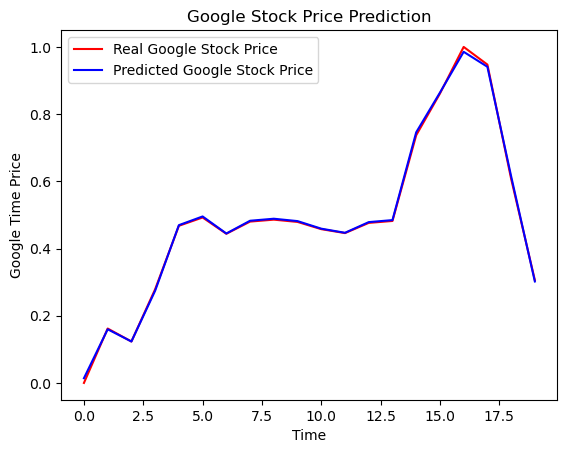

In [39]:
plt.plot(test,color='red',label='Real Google Stock Price')
plt.plot(tahmin,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Time Price')
plt.legend()
plt.show()
